<a href="https://colab.research.google.com/github/mehdijoodaki/One_Hot_encoding_textmining/blob/master/WORD_EMDEDDING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget 'http://s3.amazonaws.com/text-datasets/aclImdb.zip'

--2020-06-27 15:13:15--  http://s3.amazonaws.com/text-datasets/aclImdb.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.149
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.149|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60711700 (58M) [application/zip]
Saving to: ‘aclImdb.zip’

aclImdb.zip         100%[===================>]  57.90M  74.1MB/s    in 0.8s    

2020-06-27 15:13:16 (74.1 MB/s) - ‘aclImdb.zip’ saved [60711700/60711700]



In [ ]:
!unzip  aclImdb.zip

Streaming output truncated to the last 5000 lines.
  inflating: aclImdb/train/pos/7755_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: aclImdb/train/pos/7756_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: aclImdb/train/pos/7757_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: aclImdb/train/pos/7758_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: aclImdb/train/pos/7759_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: aclImdb/train/pos/775_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: aclImdb/train/pos/7760_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: aclImdb/train/pos/7761_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7761_10.txt  
  inflating: aclImdb/train/pos/7762_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7762_8.txt  
  inflating: aclImdb/train/pos/7763_8.txt  
  inflat

In [ ]:
import os

In [ ]:
%cd /content/drive/

/content/drive


In [ ]:
imdb_dir ='/content/aclImdb'

In [ ]:
!pwd

/content/drive


In [ ]:
train_dir = os.path.join(imdb_dir, 'train')

In [ ]:
labels = []
texts = []

In [ ]:

for label_type in ['neg','pos']:

  dir_name=os.path.join(train_dir,label_type)


  for fname in os.listdir(dir_name):


    if fname[-4:] == '.txt':

      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':



        labels.append(0)
      else:
        labels.append(1)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

Using TensorFlow backend.


In [ ]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
data = pad_sequences(sequences, maxlen=maxlen)

In [ ]:
word_index = tokenizer.word_index

In [ ]:

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
labels = np.asarray(labels)

In [ ]:
data = data[indices]
labels = labels[indices]
x_train=data[:training_samples]
y_train=labels[:training_samples]
x_val=data[training_samples: training_samples + validation_samples]
y_val=labels[training_samples: training_samples + validation_samples]

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
word_index


{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 'on': 20,
 'not': 21,
 'you': 22,
 'are': 23,
 'his': 24,
 'have': 25,
 'he': 26,
 'be': 27,
 'one': 28,
 'all': 29,
 'at': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'so': 35,
 'from': 36,
 'like': 37,
 'her': 38,
 'or': 39,
 'just': 40,
 'about': 41,
 "it's": 42,
 'out': 43,
 'if': 44,
 'has': 45,
 'some': 46,
 'there': 47,
 'what': 48,
 'good': 49,
 'more': 50,
 'when': 51,
 'very': 52,
 'up': 53,
 'no': 54,
 'time': 55,
 'she': 56,
 'even': 57,
 'my': 58,
 'would': 59,
 'which': 60,
 'only': 61,
 'story': 62,
 'really': 63,
 'see': 64,
 'their': 65,
 'had': 66,
 'can': 67,
 'were': 68,
 'me': 69,
 'well': 70,
 'than': 71,
 'we': 72,
 'much': 73,
 'been': 74,
 'bad': 75,
 'get': 76,
 'will': 77,
 'do': 78,
 'also': 79,
 'into': 80,
 'people': 81,
 'other': 82,
 '

In [ ]:
%cd content/

/content


In [ ]:
!wget 'http://nlp.stanford.edu/data/glove.6B.zip'

--2020-06-27 16:27:06--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-06-27 16:27:06--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-06-27 16:27:06--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
texts[0]

"I was able to hang in for only the first twenty minutes of this low-budget movie. The most glaring absurdity was that while the American inmates in a North Korean POW camp are all supposedly suffering from severe deprivation of food and medicine, going without bathing, shivering in flimsy and filthy parkas, and sleeping on bare floors, and - let's not forget enduring torture - they always manage to sport impeccably coiffed hair. With the exception of a suitably austere-looking Harry Morgan as an army Major, the casting and acting are simply awful. Ronald Regan cannot seem to stick to portraying a single character and instead creates a rather schizophrenic amalgam of past roles. A mostly Caucasian cast portraying the North Korean camp officers might have been forgivable, but when supposedly Russian officers acting as advisors to the Koreans strut around wearing re-badged Nazi uniforms complete with jodhpurs and jackboots (obvious costume-department recycles from WWII flicks) and speaki

In [ ]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
embeddings_index = {}


In [ ]:
glove_dir ='/content/'

In [ ]:
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:

  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

In [ ]:
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  if i < max_words:
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector


In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [-0.66496003, -0.1216    ,  0.030904  , ..., -0.50576001,
         0.019534  , -0.12076   ],
       [ 0.80053002,  0.78290999, -0.34737   , ...,  0.32482001,
        -0.091635  , -0.080588  ],
       [ 1.21309996,  0.29394999, -0.38936001, ..., -0.33770001,
        -0.0080789 ,  0.19728   ]])

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(x_train, y_train,
epochs=10,
batch_size=32,
validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.5418 - acc: 0.5250 - val_loss: 0.7112 - val_acc: 0.5074
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.8354 - acc: 0.6550 - val_loss: 0.7732 - val_acc: 0.4957
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.5466 - acc: 0.6800 - val_loss: 1.2708 - val_acc: 0.5073
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3801 - acc: 0.8650 - val_loss: 0.8965 - val_acc: 0.4990
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2583 - acc: 0.8900 - val_loss: 0.7995 - val_acc: 0.5038
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2692 - acc: 0.8800 - val_loss: 0.7961 - val_acc: 0.5059
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1398 - acc: 0.9650 - val_loss: 1.1165 - val_acc: 0.5028
Epoch 8/10
200/200 [========

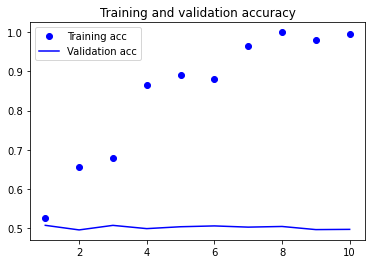

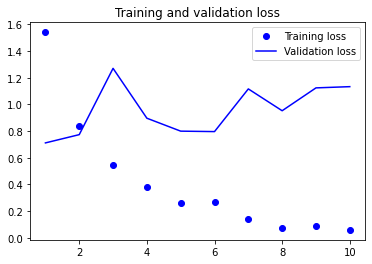

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#for read our save to google drive the path is : /content/drive/My\ Drive

drive  sample_data


In [ ]:
!cp -r aclImdb/ /content/drive/My\ Drive


^C
